In [1]:
import sympy
from sympy import Ellipse, Point, S, Eq, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from sympy.abc import x, y, u, v

In [2]:
class MyEllipse:
  def __init__(this, center, data, data_type):
    if (data_type == 1):
      this.ellipse = Ellipse(center, hradius=data[0],  vradius=data[1])
    if (data_type == 2):
      this.ellipse = Ellipse(center, hradius=data[0],  eccentricity=data[1])

  def draw(this, extra=None, xlim=None, ylim=None):
    if (extra == None):
      if (xlim == None and ylim == None):
        plot_implicit(this.ellipse.equation(x=x, y=y), aspect_ratio=(1, 1), adaptive=False)
      if (xlim != None and ylim == None):
        plot_implicit(this.ellipse.equation(x=x, y=y), xlim, aspect_ratio=(1, 1), adaptive=False)
      if (xlim == None and ylim != None):
        plot_implicit(this.ellipse.equation(x=x, y=y), ylim, aspect_ratio=(1, 1), adaptive=False)
      if (xlim != None and ylim != None):
        plot_implicit(this.ellipse.equation(x=x, y=y), xlim, ylim, aspect_ratio=(1, 1), adaptive=False)
    else:
      if (xlim == None and ylim == None):
        extra.extend(plot_implicit(this.ellipse.equation(x=x, y=y), aspect_ratio=(1, 1), adaptive=False, show=False))
      if (xlim != None and ylim == None):
        extra.extend(plot_implicit(this.ellipse.equation(x=x, y=y), xlim, aspect_ratio=(1, 1), adaptive=False, show=False))
      if (xlim == None and ylim != None):
        extra.extend(plot_implicit(this.ellipse.equation(x=x, y=y), ylim, aspect_ratio=(1, 1), adaptive=False, show=False))
      if (xlim != None and ylim != None):
        extra.extend(plot_implicit(this.ellipse.equation(x=x, y=y), xlim, ylim, aspect_ratio=(1, 1), adaptive=False, show=False))

  def output_info(this):
    properties = {
      'Эксцентриситет': this.ellipse.eccentricity,
      'Площадь': this.ellipse.area,
      'Длина': this.ellipse.circumference,
      'Центр': this.ellipse.center,
      'Горизонтальный\ радиус': this.ellipse.hradius,
      'Вертикальный\ радиус': this.ellipse.vradius,
      'Перифокусное\ расстояние': this.ellipse.periapsis,
      'Апофокусное\ расстояние': this.ellipse.apoapsis,
      'Фокусное\ расстояние': this.ellipse.focus_distance,
      'Фокусы': this.ellipse.foci,
      'Уравнение': this.ellipse.equation()
    }
    display(*[Latex(f'{key} = {latex(properties[key])}') for key in properties.keys()])

  def output_peaks(this):
    res = f'Вершины:'
    peaks = [*sympy.Line(this.ellipse.foci[0], this.ellipse.foci[1]).intersection(this.ellipse)]
    for item in peaks:
      res = f'{res}\ {latex(item)},'
    peaks = [*sympy.Segment(this.ellipse.foci[0], this.ellipse.foci[1]).perpendicular_bisector().intersection(this.ellipse)]
    for item in peaks:
      res = f'{res}\ {latex(item)},'
    display(Latex(res))

  def get_equation(this, x_label, y_label, angle):
    return(this.ellipse.equation(x=x_label, y=y_label, _slope=sympy.tan(angle)))

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

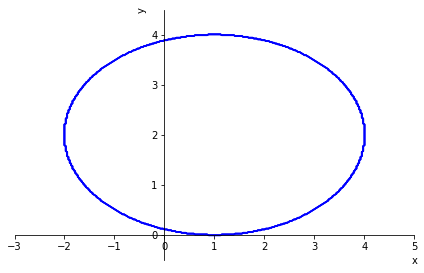

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
fig = MyEllipse(Point(1, 2), [3,  2], 1)
fig.draw(xlim=(x, -3, 5), ylim=(y, -0.5, 4.5))
fig.output_info()

### Задание 2.
Вывести на экран уравнение эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные u и v.

Изоразить на графике эллипс и повернутый эллипс.

(u + sqrt(3)*(v - 2)/3 - 1)**2/12 + 3*(v - sqrt(3)*(u - 1)/3 - 2)**2/16 - 1

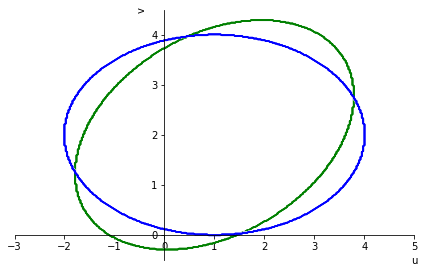

In [4]:
angle = 30 * sympy.pi / 180
display(fig.get_equation(u, v, angle))
p = plot_implicit(fig.get_equation(u, v, angle), (u, -3, 5), (v, -0.5, 4.5), line_color='g', aspect_ratio=(1, 1), adaptive=False, show=False)
fig.draw(p, xlim=(x, -3, 5), ylim=(y, -0.5, 4.5))
p.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

Указание: вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы. 

In [5]:
fig.output_peaks()

<IPython.core.display.Latex object>

###  Индивидуальное задание
Построить эллипс с заданными центром, вертикальной полуосью  и эксцентриситетом.
Изобразить на графике этот эллипс, а также эллипс, повернутый на угол $\alpha$ против часовой стрелки. 

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.


Вариант N 2

Центр $Point2D\left(-2, 2\right)$, горизонтальная полуось $26 \sqrt{22} / 11$, эксцентриситет $9 / 13$, угол поворота $\pi / 6$, против часовой стрелки.

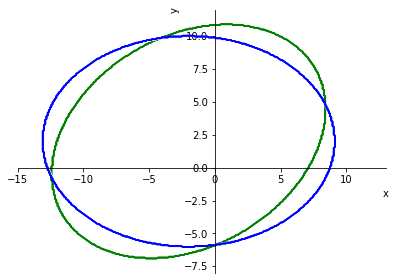

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
hr = 26 * sympy.sqrt(22) / 11
ec = S(9) / 13
fig = MyEllipse(Point(-2, 2), [hr, ec], 2)
angle = sympy.pi / 6

p = plot_implicit(fig.get_equation(x, y, angle), (x, -15, 13), (y, -8, 12), line_color='g', aspect_ratio=(1, 1), adaptive=False, show=False)
fig.draw(p, xlim=(x, -15, 13), ylim=(y, -8, 12))
p.show()

fig.output_info()
fig.output_peaks()